<h1 align=center> Facial Expression Recognition Classifier Model</h1>


### Changes and Updates
* This notebook was run on Kaggle using the [FER-2013](https://www.kaggle.com/msambare/fer2013) dataset 
* Accelerator used : GPU
* Changed 'Plot Sample Images' Section
* Changes in ImageDataGenerator()
* Changed Batch size from 64 to 128
* Changed Learning rate from 0.0005 to 0.001
* Changes in Dropout rate
* Removed 4th Convolution Layer
* Changed Fully connected layer 1st layer of 256 neurons to 1024 neurons
* Changed no. of epochs from 15 to 60
* Changes in reduce_lr
* Added 'Accuracy and Loss Curves' and 'Model Evaluation' Sections

### Import Libraries
- Let us import all the required Libraries and Packages including Tensorflow

In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# To set the backend of matplotlib to the 'inline' backend
%matplotlib inline

from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

### Plot Sample Images
- Let us have a look at random images from the Dataset

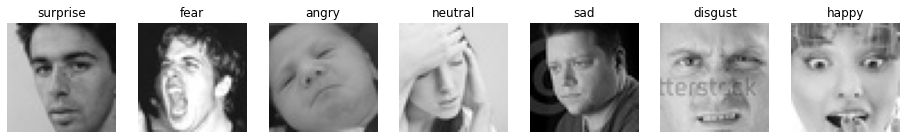

In [2]:
#train examples
plt.figure(figsize=(16,44))
i = 1
for expression in os.listdir("../input/fer2013/train"):
    img = load_img(("../input/fer2013/train/" + expression +'/'+ np.random.choice(os.listdir("../input/fer2013/train/" + expression))))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

### Data Sets
- Let us look at the number of Images in Training and Testing Datasets

In [3]:
print("Images in Training Data")
print("_______________________")
for expression in os.listdir("../input/fer2013/train/"):
    print(str(len(os.listdir("../input/fer2013/train/" + expression))) + " " + expression + " images")

print("\n")

print("Images in Testing Data")
print("_______________________")
for expression in os.listdir("../input/fer2013/test/"):
    print(str(len(os.listdir("../input/fer2013/test/" + expression))) + " " + expression + " images")

Images in Training Data
_______________________
3171 surprise images
4097 fear images
3995 angry images
4965 neutral images
4830 sad images
436 disgust images
7215 happy images


Images in Testing Data
_______________________
831 surprise images
1024 fear images
958 angry images
1233 neutral images
1247 sad images
111 disgust images
1774 happy images


### Create Training and Validation Batches
- Using the ImageDataGenerators Let us create Training and Validation Batches by loading images from corresponding directories

In [4]:
img_size = 48
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("../input/fer2013/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_generator = datagen_validation.flow_from_directory("../input/fer2013/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Create Convolutional Neural Network (CNN) Model
- Let us create a Neural Network using 3 Convolutional Layers and 2 Fully Connected dense Layers.

In [5]:
# Initialising the CNN
model = Sequential()

# 1st Convolution Layer

# There are 64 (3,3) filters with "same" Padding and Shape of the Input_Image is (48,48,1)
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))  

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))




# 2nd Convolution layer

# There are 128 (5,5) filters with "same" Padding 
model.add(Conv2D(128,(5,5), padding='same'))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))




# 3rd Convolution layer

# There are 512 (3,3) filters with "same" Padding 
model.add(Conv2D(512,(3,3), padding='same'))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.5))



# Flattening
model.add(Flatten())


# Fully connected layer 1st layer of 1024 neurons
model.add(Dense(1024))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a dropout layer  
model.add(Dropout(0.25))



# Fully connected layer 2nd layer of 512 neurons
model.add(Dense(512))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a dropout layer  
model.add(Dropout(0.25))

# Adding a final Dense Layer with 7 outputs corresponding to 7 different emotions with a "softmax" Activation Function 
model.add(Dense(7, activation='softmax'))

### Compiling the Model
- Let us use Adam Optimizer.

In [6]:
# let us choose a Learning rate of 0.001
opt = Adam(lr=0.001)

# As we have Categorical Values we will use 'categorical_crossentropy' loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Let us check the details of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### Training Model

In [7]:
%%time

# Let us train the Model 60 times
epochs = 60

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# Create a Callback which reduces the Learning rate by a factor of "0.2" when the val_loss does not decrease
# after 4 epochs also and allowing the minimum value of Learning Rate to be 0.00001
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=4, min_lr=0.00001, mode='auto', verbose=1)


# Create another Callback which saves the Model Weights by monitoring the Val_Accuracy
checkpoint = ModelCheckpoint("fer_model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

# List of callbacks 
callbacks = [checkpoint, reduce_lr]

# Fitting the model .
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/60
224/224 [==============================] - ETA: 0s - loss: 1.7309 - accuracy: 0.3453
Epoch 00001: saving model to fer_model_weights.h5
224/224 [==============================] - 173s 773ms/step - loss: 1.7309 - accuracy: 0.3453 - val_loss: 2.0262 - val_accuracy: 0.3184
Epoch 2/60
224/224 [==============================] - ETA: 0s - loss: 1.4109 - accuracy: 0.4604
Epoch 00002: saving model to fer_model_weights.h5
224/224 [==============================] - 27s 121ms/step - loss: 1.4109 - accuracy: 0.4604 - val_loss: 1.5959 - val_accuracy: 0.3605
Epoch 3/60
224/224 [==============================] - ETA: 0s - loss: 1.2835 - accuracy: 0.5121
Epoch 00003: saving model to fer_model_weights.h5
224/224 [==============================] - 26s 118ms/step - loss: 1.2835 - accuracy: 0.5121 - val_loss: 1.3339 - val_accuracy: 0.4830
Epoch 4/60
224/224 [==============================] - ETA: 0s - loss: 1.2058 - accuracy: 0.5390
Epoch 00004: saving model to fer_model_weights.h5
224/224 [====

### Accuracy and Loss Curves

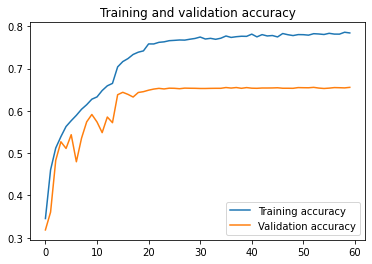

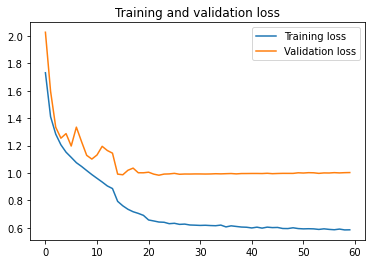

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model Evaluation

In [9]:
train_loss, train_accu = model.evaluate_generator(train_generator)
test_loss, test_accu = model.evaluate_generator(validation_generator)
print("Train accuracy = {:.2f} , Validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

Train accuracy = 87.54 , Validation accuracy = 65.60


Classification Report and Confusion Matrix for Validation set

Classification Report
              precision    recall  f1-score   support

       angry       0.58      0.55      0.57       958
     disgust       0.82      0.65      0.72       111
        fear       0.57      0.40      0.47      1024
       happy       0.83      0.85      0.84      1774
     neutral       0.57      0.66      0.61      1233
         sad       0.52      0.56      0.54      1247
    surprise       0.77      0.80      0.79       831

    accuracy                           0.66      7178
   macro avg       0.67      0.64      0.65      7178
weighted avg       0.66      0.66      0.65      7178

____________________________________
Confusion Matrix
[[ 528    7   81   61  120  145   16]
 [  19   72    3    3    8    5    1]
 [  95    4  408   47  132  230  108]
 [  33    0   22 1516  102   67   34]
 [  68    1   53   82  819  193   17]
 [ 140    1   96   66  224  699   21]
 [  21    3   53   43   27   17  667]]


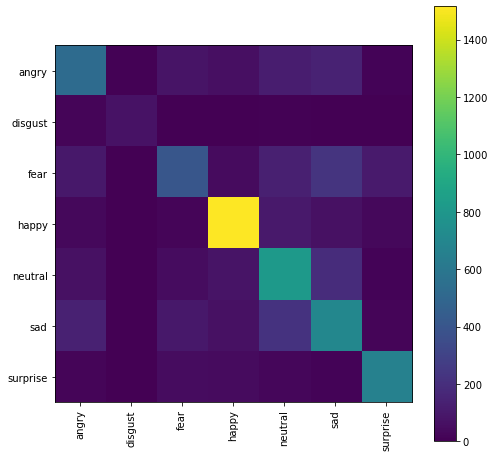

In [10]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print("____________________________________")

cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

### Represent Model as JSON String

In [11]:
# Converting the model into JSON format and storing it in "fer_model.json" file. 
model_json = model.to_json()
with open("fer_model.json", "w") as json_file:
    json_file.write(model_json)